# Contents

## Import Libraries and Data
## Data Cleaning
### &emsp; Missing values
### &emsp; Duplicates
### &emsp; Extreme values
#### &emsp; &emsp; for 'totalyearlycompensation'
#### &emsp; &emsp; for 'yearsofexperience'
#### &emsp; &emsp; for 'yearsatcompany'
## Hypothesis
### &emsp; Comparing the variables pairwise
### &emsp; Hypothesis
## Running a linear regression
### &emsp; Reshaping and splitting
### &emsp; Regression analysis
### &emsp; Checking the model performance
## Exporting Data

___

# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Turning project folder into string

path = r'C:\Users\davau\OneDrive - College of the Sequoias\Career Foundry\Data Immersion\Achievement 6 (Python and Tableau)\Job Market for Data Analytics'

In [4]:
# Importing stem_salaries_clean.csv

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stem_salaries_clean.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Data cleaning

## Missing values

In [6]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                     0
timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19529
otherdetails               22467
race                       40171
education                  32232
dtype: int64

While there are plenty of missing values in this dataset, none of them are in the continuous columns that I will be using for this analysis ('totalyearlycompensation', 'yearsofexperience', and 'yearsatcompany').

## Duplicates

In [7]:
# Check for duplicates

dups = df.duplicated()
dups.shape 

(62598,)

No duplicates.

## Extreme values

### Extreme values in 'totalyearlycompensation'

C:\Users\davau\AppData\Local\Temp\ipykernel_68\2983069018.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totalyearlycompensation'], bins=25)


<Axes: xlabel='totalyearlycompensation', ylabel='Density'>

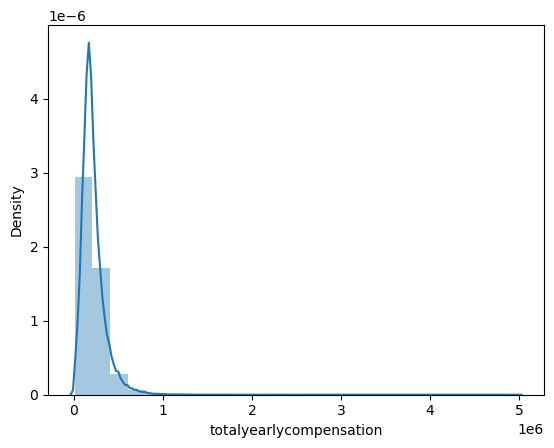

In [8]:
# Histogram to get a sense for extreme values

sns.distplot(df['totalyearlycompensation'], bins=25)

Note that most people make less than $1 million, but there are a few who make much more than that.

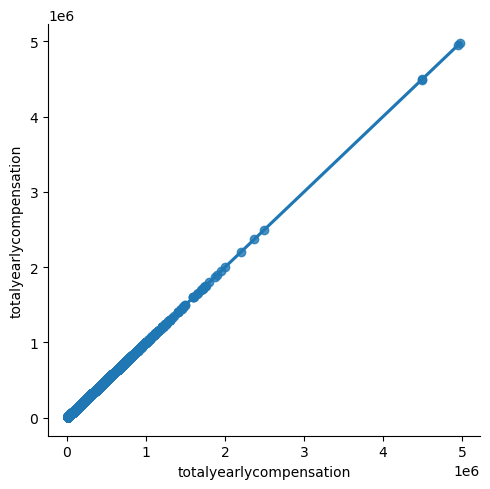

In [9]:
# Scatterplot

sns.lmplot(x = 'totalyearlycompensation', y = 'totalyearlycompensation', data = df)

<Axes: >

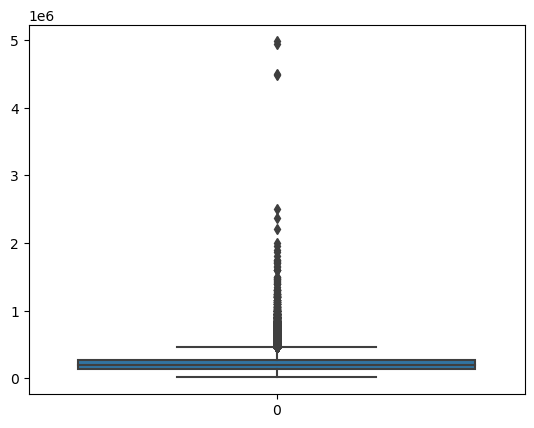

In [10]:
# Box Plot to identify outliers

sns.boxplot(df['totalyearlycompensation'])

Given that the upper fence is well below $1 million, I feel safe removing all salaries over 1 million USD from the dataset for this analysis.  From previous work, I know that such individuals account for fewer than 0.2 percent of the dataset.

In [11]:
df.shape

(62598, 17)

In [12]:
# Making a subset that excludes people making over $1 million

df_sub = df[df['totalyearlycompensation'] <= 1000000] 
df_sub.shape

(62488, 17)

<Axes: >

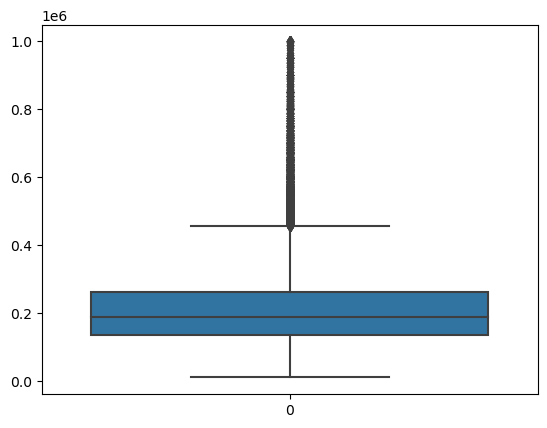

In [13]:
# Box Plot to identify outliers

sns.boxplot(df_sub['totalyearlycompensation'])

### Extreme values in 'yearsofexperience'

C:\Users\davau\AppData\Local\Temp\ipykernel_68\1914175029.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['yearsofexperience'], bins=25)


<Axes: xlabel='yearsofexperience', ylabel='Density'>

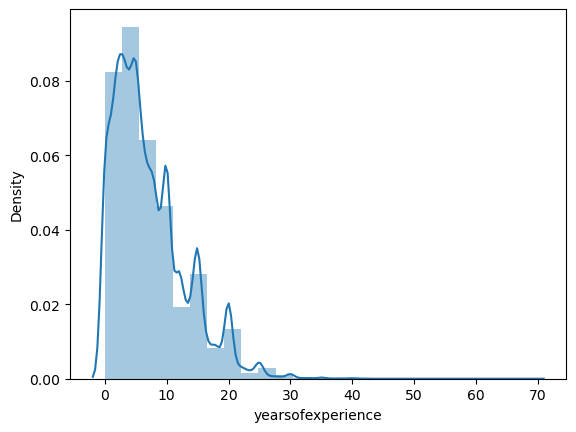

In [14]:
# Histogram to get a sense for extreme values

sns.distplot(df_sub['yearsofexperience'], bins=25)

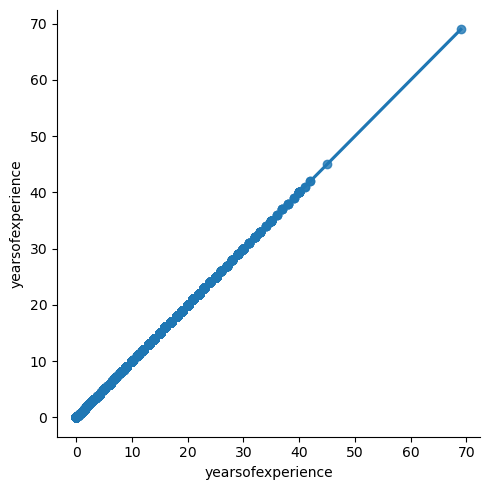

In [15]:
# Scatterplot

sns.lmplot(x = 'yearsofexperience', y = 'yearsofexperience', data = df_sub)

I'm going to remove the individual who claimed 70 years of experience as this is not reasonable.

In [16]:
df_sub.shape

(62488, 17)

In [17]:
# Making a subset that excludes people making over $1 million

df_sub = df_sub[df_sub['yearsofexperience'] < 50] 
df_sub.shape

(62487, 17)

C:\Users\davau\AppData\Local\Temp\ipykernel_68\1914175029.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['yearsofexperience'], bins=25)


<Axes: xlabel='yearsofexperience', ylabel='Density'>

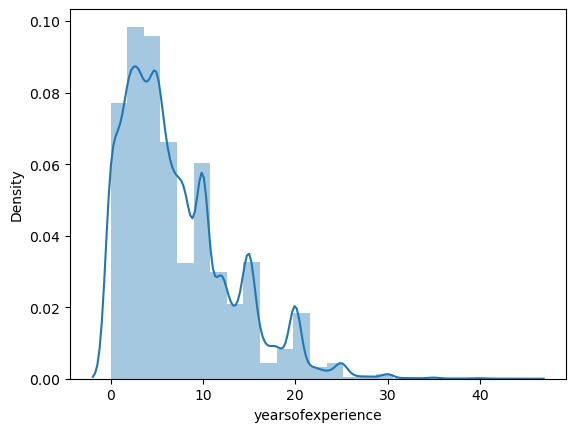

In [18]:
# Histogram to get a sense for extreme values

sns.distplot(df_sub['yearsofexperience'], bins=25)

### Extreme values in 'yearsatcompany'

C:\Users\davau\AppData\Local\Temp\ipykernel_68\2216909151.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['yearsatcompany'], bins=25)


<Axes: xlabel='yearsatcompany', ylabel='Density'>

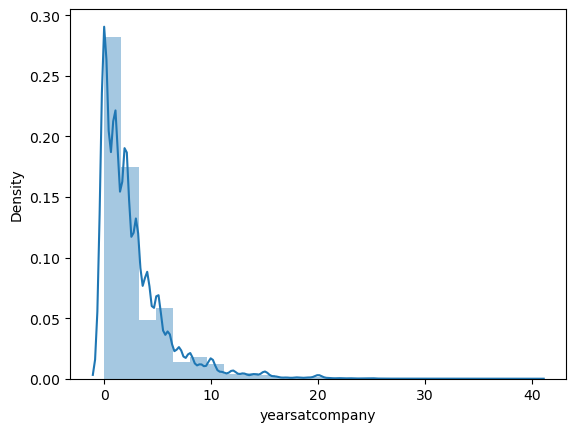

In [19]:
# Histogram to get a sense for extreme values

sns.distplot(df_sub['yearsatcompany'], bins=25)

These are all reasonable, so I will not remove any more rows.

# Hypothesis

## Comapring my three continuous variables pairwise

In [20]:
# Creating a correlation matrix using pandas

df_sub.corr()

C:\Users\davau\AppData\Local\Temp\ipykernel_68\252983842.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
Unnamed: 0,1.000000,-0.099809,-0.005339,-0.013250,0.041075,-0.022371,-0.015732
totalyearlycompensation,-0.099809,1.000000,0.436042,0.167087,0.697334,0.814632,0.482830
yearsofexperience,-0.005339,0.436042,1.000000,0.520948,0.370127,0.285714,0.259077
yearsatcompany,-0.013250,0.167087,0.520948,1.000000,0.142907,0.084086,0.104453
basesalary,0.041075,0.697334,0.370127,0.142907,1.000000,0.467423,0.389404
stockgrantvalue,-0.022371,0.814632,0.285714,0.084086,0.467423,1.000000,0.236218
bonus,-0.015732,0.482830,0.259077,0.104453,0.389404,0.236218,1.000000


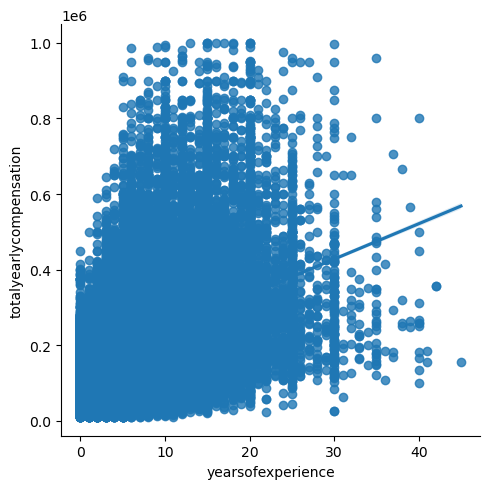

In [21]:
# Creating a scatterplot for 'yearsofexperience' and 'totalyearlycompensation'

sns.lmplot(x = 'yearsofexperience', y = 'totalyearlycompensation', data = df_sub)

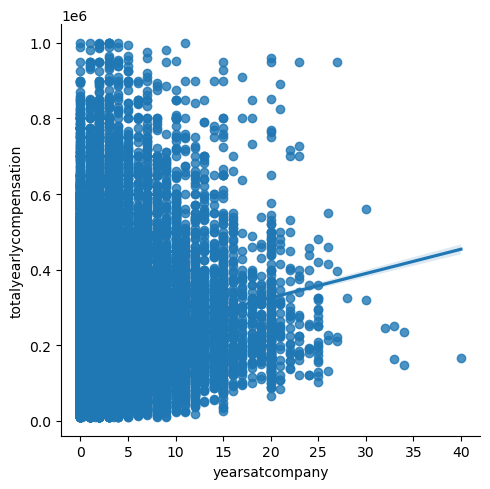

In [22]:
# Creating a scatterplot for 'yearsatcompany' and 'totalyearlycompensation'

sns.lmplot(x = 'yearsatcompany', y = 'totalyearlycompensation', data = df_sub)

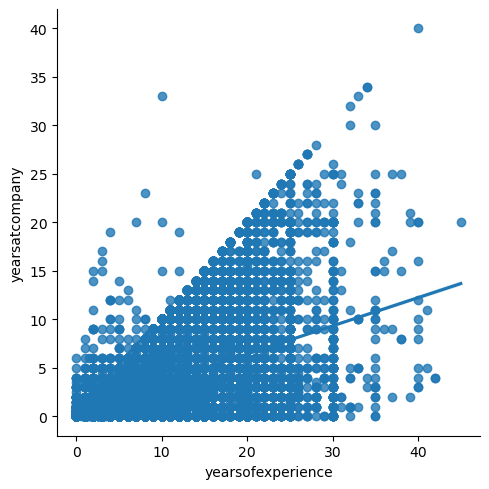

In [23]:
# Creating a scatterplot for 'yearsofexperience' and 'yearsatcompany'

sns.lmplot(x = 'yearsofexperience', y = 'yearsatcompany', data = df_sub)

## Hypothesis

The relationship with the highest correlation is between 'yearsofexperience' and 'yearsatcompany'.  However, the correlation between 'yearsofexperience' and 'totalyearlycompensation' is not that much lower, and it is the more interesting and relevant correlation to study for the purposes of this project.  Therefore, I state the following hypothesis:

Hypothesis: As years of experience increase, so too does salary.

# Running a linear regression

## Reshaping and splitting

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df_sub['yearsofexperience'].values.reshape(-1,1)
y = df_sub['totalyearlycompensation'].values.reshape(-1,1)

In [25]:
X

array([[ 1.5],
       [ 5. ],
       [ 8. ],
       ...,
       [14. ],
       [ 8. ],
       [ 0. ]])

In [26]:
y

array([[127000],
       [100000],
       [310000],
       ...,
       [220000],
       [280000],
       [200000]], dtype=int64)

In [27]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [28]:
# Create a regression object

regression = LinearRegression() 

In [29]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

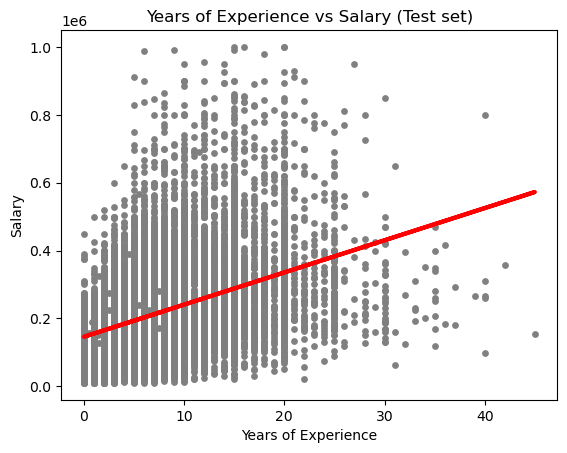

In [31]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Years of Experience vs Salary (Test set)')
plot_test.xlabel('Years of Experience')
plot_test.ylabel('Salary')
plot_test.show()

It's difficult to see much of a difference between this scatterplot and the original, which means that the model worked well.  There seems to be a moderate correlation between these variables, but it is not very clean.  I expect a rather large MSE and small R^2 score.

## Checking the model performance

In [32]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [33]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9478.5787611]]
Mean squared error:  12698831933.67585
R2 score:  0.17988837056429008


In [34]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,142000,174431.841898
1,228000,250260.471987
2,92000,164953.263137
3,195000,183910.420659
4,190000,174431.841898
5,195000,183910.420659
6,215000,164953.263137
7,84000,145996.105615
8,211000,221824.735704
9,363000,240781.893226


The slope is actually fairly large and appropriate for the salary range.  It is the kind of correlation I would expect to see between experience and salary.  Unfortunately, the model did not perform well, though.  As expected, we see quite a low R^2 score (about 18%), indicating a poor fit (but not worse than a horizontal line).  We also see a very large MSE (over 12 billion!), indicating that many of the points are quite far from the line.  Since most of the values are on the order of 10^5, an MSE on the order of 10^10 is pretty bad.  This observation is further reflected in the comparison of the predicted y values with the actual y values.  Note, for example, rows 6 and 7. 

It is becoming more and more clear to me that there is a severe issue with outliers in this dataset.  It could be that some individuals lied about their salary when filling out the survey, but a more likely explanation is that some of these individuals are entrepeneurs who have started their own tech companies or are employed in high senior level positions. I cannot remove these individuals from the dataset, as they are, indeed, STEM employees.  But perhaps in the future I can restrict my attention just to the data scientists and business analysts.

# Exporting data

In [35]:
# Exporting the subset of the df as 'stem_salaries_fewer_outliers.csv'

df_sub.to_csv(os.path.join(path,'02 Data','Prepared Data','stem_salaries_fewer_outliers.csv'))